Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

In [4]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

### Load Competition Data

In [2]:
import pandas as pd

# You may need to change the path
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
# Look at head of data
train.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
1,3861,\nAn uncommon exclusive bottling of a 6 year o...,0
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1


### Define Pipeline Components

In [7]:
# Define components
# TFIDFVectorizer includes a build in tokenizer

# Vectorizer
vect = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2), min_df= 5)

# Classifier model
clf = RandomForestClassifier()

# Define pipeline using components
pipe = Pipeline([('vect', vect), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [9]:
# Define parameter grid to search
# Define parameters to tune for each model by attaching the model name followed by double underscore

parameters = {
    'vect__max_df': (0.75, 1.0),
    'vect__min_df': (0.02, 0.05),
    'clf__max_depth':(5,10,15,20)
}

# Define grid search
grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)

# Fit grid search - using the description column (text) and trying to predict the ratingCategory
grid_search.fit(train['description'], train['ratingCategory'])

# Also try using Randomized CV instead

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=5,
                                                        ngram_range=(1, 2),
                                                        no

In [10]:
# Look at the best accuracy
grid_search.best_score_

0.7274305482817751

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [11]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [12]:
# Save in Kaggle submission format
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [13]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [14]:
# Number submission files so you can keep track
subNumber = 0

In [15]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 70% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components
- Truncated SVD is a method to reduce dimensionality, similar to PCA but can be used on sparse matrices
- Can be used on the outputs of count/tfidf vectorizers. - in this case it is called latent semantic analysis

In [23]:
# Import

from sklearn.decomposition import TruncatedSVD

# Instantiate TruncatedSVD model
svd = TruncatedSVD(n_components=100, # Suggested value to use for LSA 
                   algorithm='randomized',
                   n_iter=10) # Number of iterations for randomized svd solver to run through

In [24]:
# Define Latent Semantic Indexing using vect and svd objects

lsi = Pipeline([('vect', vect), ('svd', svd)])

# Vectorizer
vect = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2), min_df= 5)

# Classifier model
clf = RandomForestClassifier()

# Define final pipe with lsi pipe and clf

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [27]:
# Define Parameter grid to search

params = { 
    'lsi__svd__n_components': [10,100,250],
    'lsi__vect__max_df':[.9, .95, 1.0],
    'clf__n_estimators':[5,10,20]
}

In [28]:
# Define grid search
grid_search = GridSearchCV(pipe,params, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
# X is input text, y is target

grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsi',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=1.0,
             

In [29]:
# Best score
grid_search.best_score_

0.7240084631890182

### Make a Submission File

In [30]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [31]:
# Submission df
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [32]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [33]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [37]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint

import spacy

## No need to hyperparameter tune word embeddings, would only be doing it for the classifier
# param_dist = {
    
#     'max_depth' : randint(3,10),
#     'min_samples_leaf': randint(2,15)
# }

In [38]:
# Set nlp model
nlp = spacy.load('en_core_web_lg')

In [39]:
# Define a function to get vectors for each word in my documents

def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [41]:
# Apply function to get all word vectors

X = get_word_vectors(train['description'])

# Make sure result is same length as the original list
len(X) == len(train['description'])

True

In [ ]:
# Define classifier to use
clf = RandomForestClassifier()

In [42]:
# Fit classifier
# X is the list of vectors from spacy, y is target

clf.fit(X, train['ratingCategory'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# Get score for training data
clf.score(X, train['ratingCategory'])

1.0

#### Best submission - 80 on kaggle

### Make a Submission File

In [45]:
# Create word vectors for test set
X_test = get_word_vectors(test['description'])

In [46]:
# Create Predicitons for submission
test['ratingCategory'] = clf.predict(X_test)

In [49]:
# Create submission df
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':test['ratingCategory']})

# Convert prediction to integer
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [50]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [51]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

#### Balancing the classes by up/down sampling - didn't end up helping, 76 on kaggle

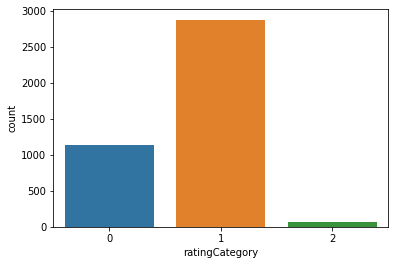

In [52]:
# Look at distribution

import seaborn as sns

sns.countplot(x='ratingCategory', data=train);

In [53]:
# Very few 2, mostly 1's and 0's

train['ratingCategory'].value_counts()

1    2881
0    1141
2      65
Name: ratingCategory, dtype: int64

##### Upsample

In [56]:
# Upsample, pull in equal amounts of each category

from sklearn.utils import resample

# Seperate the data into the three different target categories
zero = train[train['ratingCategory'] == 0] 
one = train[train['ratingCategory'] == 1]
two = train[train['ratingCategory'] == 2]

# upsample for the zeros and the twos
zero_upsampled = resample(zero,
                         replace= True,
                         n_samples= one.shape[0]
                         )

two_upsampled = resample(two,
                        replace= True,
                        n_samples= one.shape[0]
                        )

# Put all three samples together into a dataframe to process
df_upsampled = pd.concat([one, zero_upsampled, two_upsampled])

In [58]:
# Look at the resulting df
df_upsampled.head()

,id,description,ratingCategory
0,1321,"\nSometimes, when whisky is batched, a few lef...",1
2,655,\nThis release is a port version of Amrut’s In...,1
3,555,\nThis 41 year old single cask was aged in a s...,1
4,1965,"\nQuite herbal on the nose, with aromas of dri...",1
5,3190,\nCooley produced some great Irish single malt...,1


In [60]:
# Make sure the classes are balanced
df_upsampled['ratingCategory'].value_counts()

2    2881
1    2881
0    2881
Name: ratingCategory, dtype: int64

In [ ]:
# Use random forest classifier and spacy to do word embedding

# Set nlp model
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Define function to get vectors for each word in my documents

def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [61]:
# Apply function to get all word vectors

X = get_word_vectors(df_upsampled['description'])

# Make sure result is same length as the original list
len(X) == len(df_upsampled['description'])

True

In [62]:
# Fit classifier
clf.fit(X, df_upsampled['ratingCategory'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
# Get score
clf.score(X, df_upsampled['ratingCategory'])

1.0

In [85]:
# Apply function to get all word vectors for regular training dataset

X = get_word_vectors(train['description'])

# Make sure result is same length as the original list
len(X) == len(train['description'])

True

In [66]:
# Get score for original training data
clf.score(X, train['ratingCategory'])

0.9853193051137754

##### Create submission for rfc with word embedding and balanced classes

In [67]:
# Create word vectors for test set
X_test = get_word_vectors(test['description'])

In [68]:
# Create Predicitons for submission
test['ratingCategory'] = clf.predict(X_test)

In [69]:
# Create submission df
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':test['ratingCategory']})

# Convert prediction to integer
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [70]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [71]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

#### Gave me a worse result in the Kaggle competition

#### Try using XGBoost - Gave me 76% on the kaggle

In [ ]:
# Set nlp model
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Define function to get vectors for each word in my documents

def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [74]:
# pip install xgboost

     |████████████████████████████████| 1.1 MB 782 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [81]:
# Import XGBoost classifier
from xgboost import XGBClassifier

In [82]:
# Define classifier
clf = XGBClassifier()

In [87]:
import numpy as np

In [88]:
# XGBClassifier needs the vectors as a matrix - turn list into np array
X = np.array(X)

In [89]:
# Fit classifier
clf.fit(X, train['ratingCategory'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

##### Create submission for xgbclassifier

In [97]:
# Create word vectors for test set
X_test = get_word_vectors(test['description'])

In [99]:
# XGBClassifier needs input as matrix
X_test = np.array(X_test)

In [100]:
# Create Predicitons for submission
test['ratingCategory'] = clf.predict(X_test)

In [101]:
# Create submission df
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':test['ratingCategory']})

# Convert prediction to integer
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [102]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [103]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

#### Do binary classifier, take out the 2 values, balance remaining classes
- worse, 75% on kaggle

In [104]:
# Upsample zero class, get rid of the two class

minority = train[train['ratingCategory'] == 0]
majority = train[train['ratingCategory'] == 1]

df_minority_upsampled = resample(minority,
                                 replace=True,
                                 n_samples=majority.shape[0]
                                )

df_upsampled = pd.concat([majority, df_minority_upsampled])

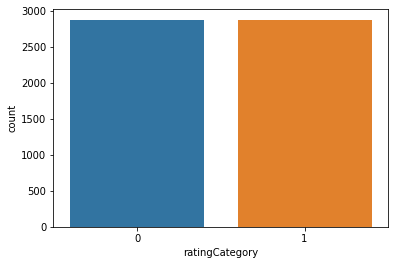

In [105]:
sns.countplot(x='ratingCategory', data=df_upsampled);

In [ ]:
# Use random forest classifier and spacy to do word embedding

# Set nlp model
nlp = spacy.load('en_core_web_lg')

In [ ]:
# Define function to get vectors for each word in my documents

def get_word_vectors(docs):
    return [nlp(doc).vector for doc in docs]

In [106]:
# Apply function to get all word vectors

X = get_word_vectors(df_upsampled['description'])

# Make sure result is same length as the original list
len(X) == len(df_upsampled['description'])

True

In [107]:
# Define Classifier
clf = RandomForestClassifier()

In [108]:
# Fit classifier
clf.fit(X, df_upsampled['ratingCategory'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [109]:
# Apply function to get all word vectors for regular training dataset

X = get_word_vectors(train['description'])

# Make sure result is same length as the original list
len(X) == len(train['description'])

True

In [110]:
# Get score
clf.score(X, train['ratingCategory'])

0.9681918277465134

##### Create submission for binary classifier - Random forest and word embedding with spacy

In [111]:
# Create word vectors for test set
X_test = get_word_vectors(test['description'])

In [112]:
# Create Predicitons for submission
test['ratingCategory'] = clf.predict(X_test)

In [113]:
# Create submission df
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':test['ratingCategory']})

# Convert prediction to integer
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [114]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [115]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

#### XGBClassifier, Tf idf vectorizer, LSI

In [116]:
# Define objects: vectorizer, classifier, Truncated SVD
vect = TfidfVectorizer(stop_words = 'english', ngram_range= (1,2), min_df= 5)
svd = TruncatedSVD(n_components=100, # Just here for demo. 
                   algorithm='randomized',
                   n_iter=10)
clf = XGBClassifier()

In [117]:
# Define pipes

lsi = Pipeline([('vect', vect), ('svd', svd)])

# Define final pipe with lsi pipe and clf from above, 

pipe = Pipeline([('lsi', lsi), ('clf', clf)])

In [118]:
# Define Parameter grid to search

params = { 
    'lsi__svd__n_components': [10,100,250],
    'lsi__vect__max_df':[.9, .95, 1.0]
#     'clf__n_estimators':[5,10,20]
}

In [119]:
# Define grid search
grid_search = GridSearchCV(pipe, params, cv=5, n_jobs=-1, verbose=1)

# Fit grid search
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsi',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=1.0,
             

In [120]:
# Best score
grid_search.best_score_

0.7386894626114384

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 70% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
        - Sentiment Analysis is a method that extracts the underlying sentiment of the text, whether the text is positive, neutral or negative. 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
        - Document classification predicts which predefined class or category a document belongs in. As an example, in the whiskey reviews, we are classifying the reviews (documents) as either a 0, 1 or 2 rating. We are doing this be examining the just the words in the text. Sentiment analysis examines the emotion (semtiment) behind the review. It can tell you whether the review in positive, neutral or negative. In a business application, document classification can determine which department the document should go to, sentiment analysis would tell you whether it was a positive, neutral or negative document.
    - How do create labeled sentiment data? Are those labels really sentiment?
        - 
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?